## Exploring Weather Trends
**Lesson 3 Project ** <br>
*Report by Devin de Araujo*

<br>
**1. Determining the data available for cities in Australia.**
<br>
    <code>SELECT </code><br>
    <code>FROM city_list </code><br>
    <code>WHERE city IN ('Melbourne', 'Sydney', 'Brisbane','Canberra', 'Adelaide', 'Perth');</code><br>


**2. Extract local City Data**<br>
    <code>SELECT</code><br>
    <code>FROM city_data></code><br>
    <code>WHERE city IN ('Melbourne', 'Adelaide', 'Brisbane', 'Sydney', 'Perth', 'Canberra')</code><br>


**3. Extract the Global Data**<br>
    <code>SELECT </code><br>
    <code>FROM global_data;</code>
    <br>


**4. Assessing the data**<br>
It was determined that the available City data contained less observations than the Global data set. I decided to combine the data and use only the available information that was true for both data sets.
<br>
<br>
**5. Combining data**<br>
Excel formula - Combine Data into one<br>
    <code>=VLOOKUP(A2, global_data!A:B,2,FALSE)</code>
<br>
<br>
**6. Calculate moving averages**
Given the range of the City data (MIN 1841, MAX 2013), I decided to calculate moving averages in 10 year periods.<br>
Formula<br>
<code>=ROUND(AVERAGE(D22:D31),2)</code>

 <code> hello </code>

In [ ]:
# Install Packages
library(ggplot2)
library(ggthemes)
library(lubridate)
library(RColorBrewer)
library(tidyverse)

InlineBackend.figure_format = 'retina'

In [5]:
# load in Data

weather <- read.csv('city_data.csv', header = TRUE)

# Subset City Data
mel <- subset(weather, city == 'Melbourne')
adl <- subset(weather, city == 'Adelaide')
syd <- subset(weather, city == 'Sydney')
can <- subset(weather, city == 'Canberra')

head(weather)

year,city,country,city_avg_temp,X10_city_avg,global_avg_temp,X10_glo_avg,avg_diff
1841,Adelaide,Australia,15.54,NA,7.69,NA,NA
1842,Adelaide,Australia,15.61,NA,8.02,NA,NA
1843,Adelaide,Australia,15.89,NA,8.17,NA,NA
1844,Adelaide,Australia,15.26,NA,7.65,NA,NA
1845,Adelaide,Australia,15.62,NA,7.85,NA,NA
1846,Adelaide,Australia,16.12,NA,8.55,NA,NA


**Plot 1**<br>
How do the yearly averages for Melbourne, Australia compare to the 10 year moving average?
A dot plot was chosen for the yearly averages since a line graph would be too hard to read. The dot plot provides a broad indication of the yearly temperatures while the moving average is a solid indication of the overall trend.
Considerations
Appropriate breaks were set on the X and Y axes. These were determined on the X axis by the 10 year moving average and on the Y axis, by half degrees.
<br>
<br>
**Observation 1**<br>
The data suggests that on average, local temperatures in Melbourne have followed an increasing trend.

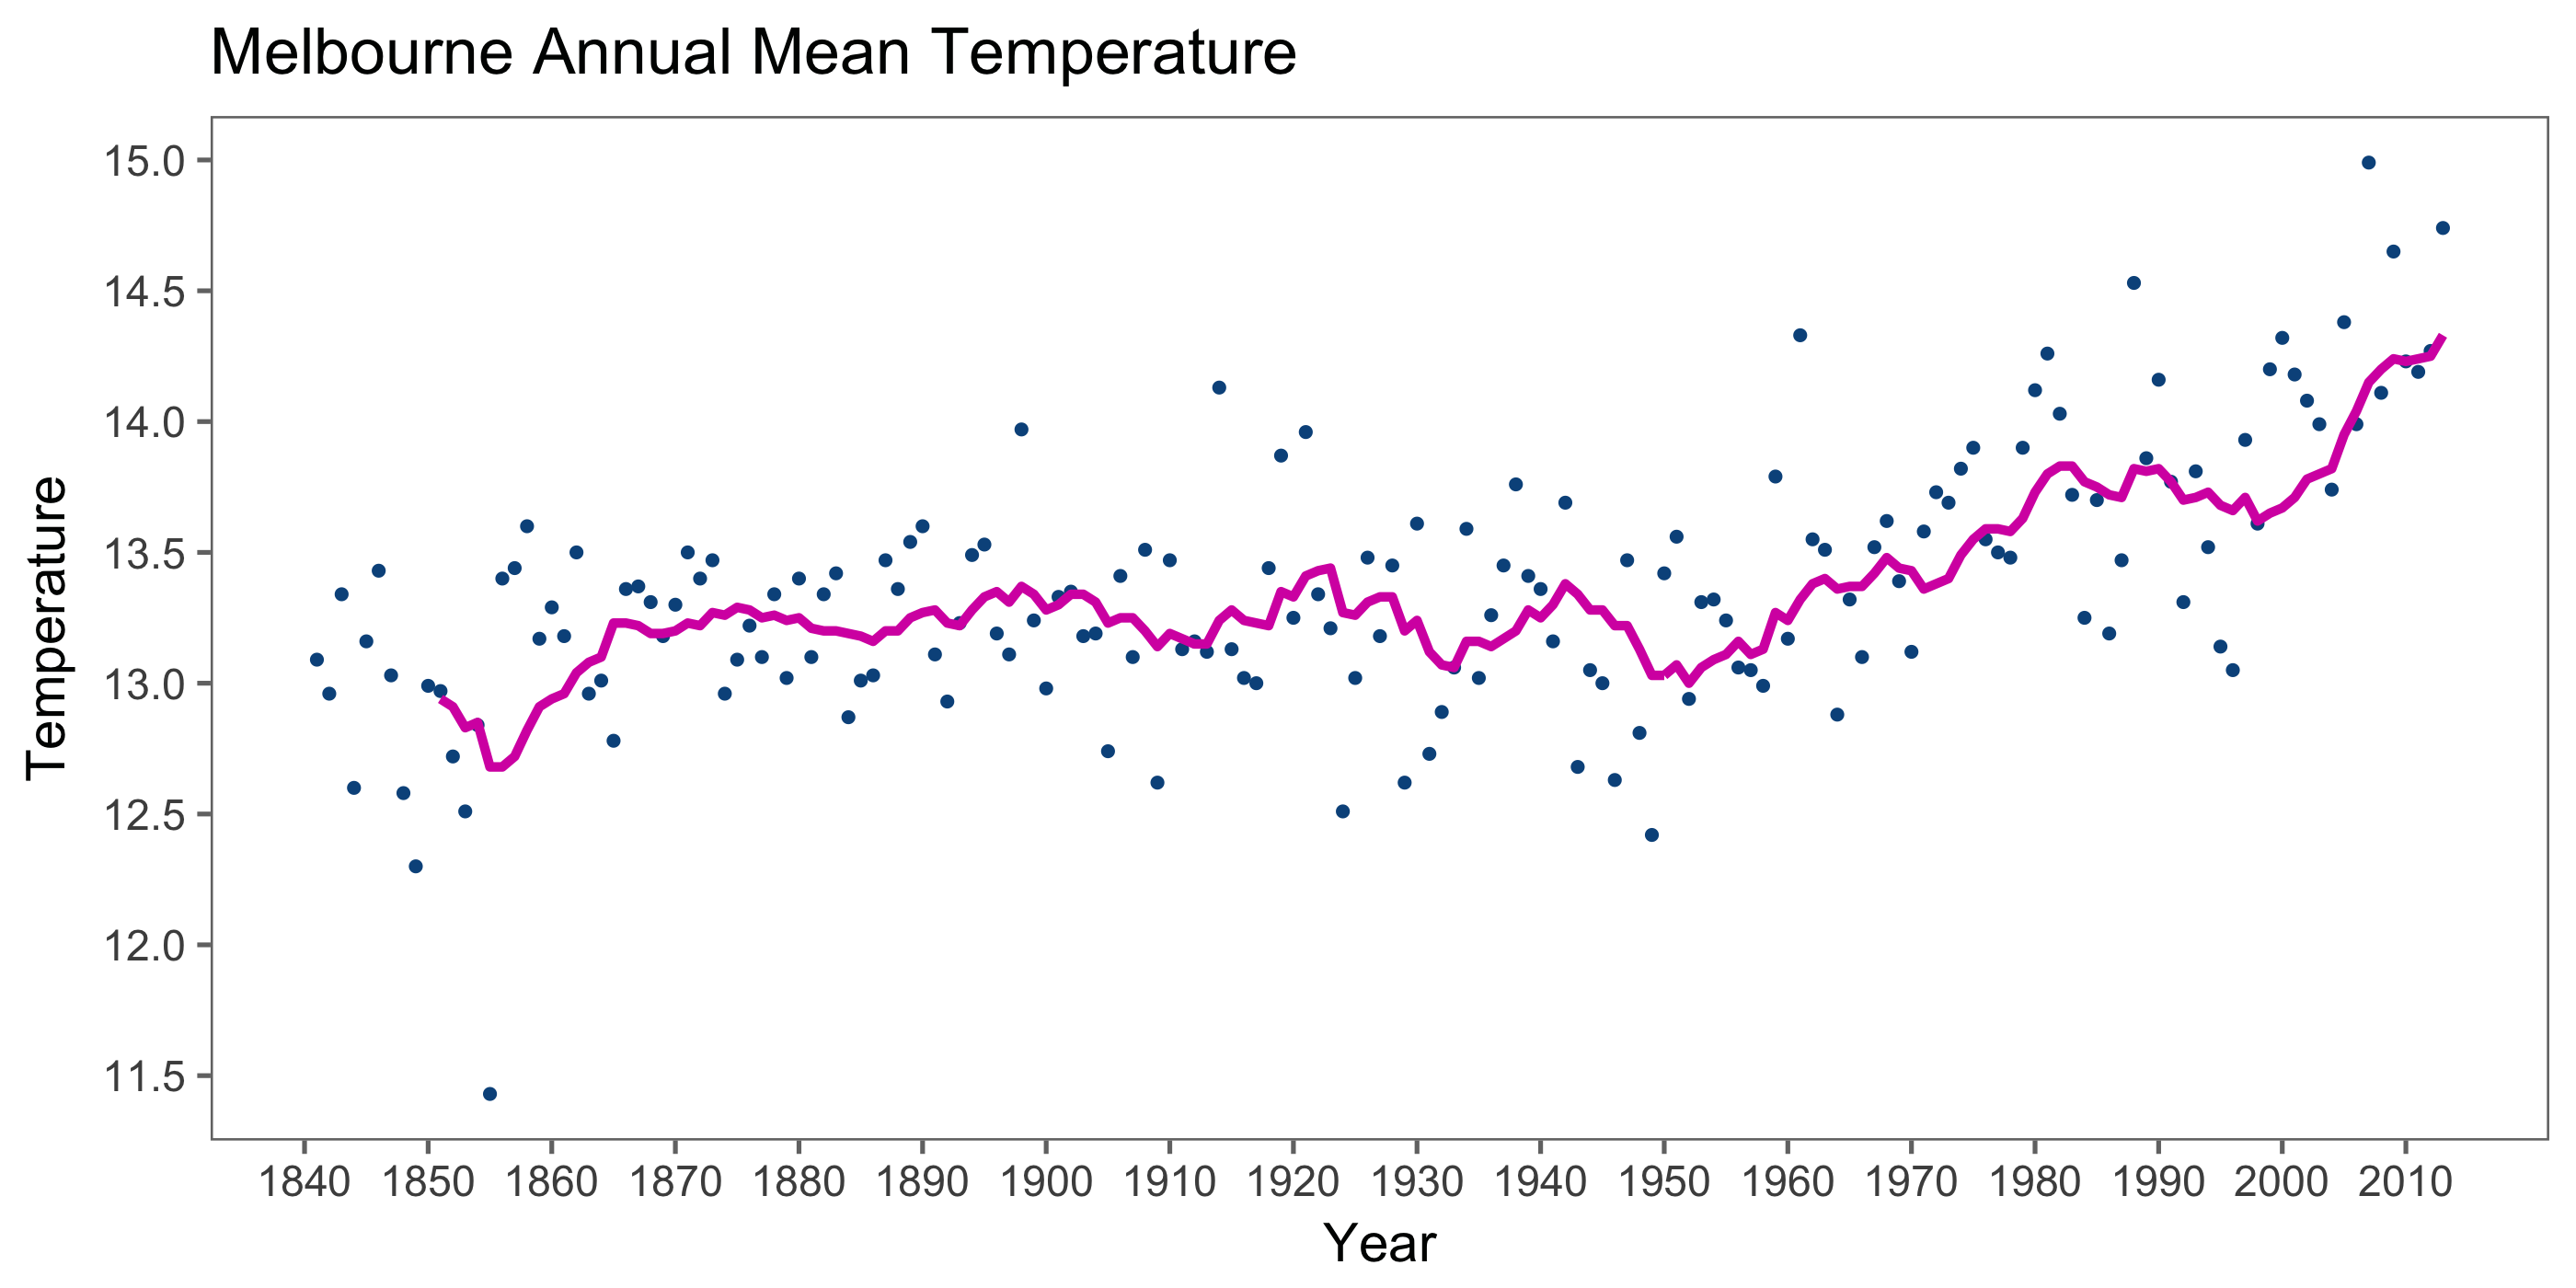

In [7]:
# Set plot options
options(repr.plot.width=8, repr.plot.height=4,repr.plot.res = 350, repr.plot.quality = 100)


p <- ggplot(data = subset(weather, city == 'Melbourne'), aes(x = year, y = city_avg_temp)) +
  geom_point(size = .8, colour = '#08538b') +
  geom_line(aes(y = X10_city_avg), colour = '#d617b1', size = 1) +
  scale_x_continuous(breaks = seq(1840, 2013, 10)) +
  scale_y_continuous(breaks = seq(0,16, 0.5)) +
  labs(title = "Melbourne Annual Mean Temperature", 
       x = "Year",
       y = "Temperature") +
  theme_few() + scale_colour_tableau()
p

**Plot 2** <br>
What do yearly averages suggest is happening to global temperature?
The same plotting method as above was used to determine this.<br>
<br>
**Observation 2**<br>
Over time, Global temperatures have continually increased. After a fairlystable period between 1950 - 1980, this increase accelerated rather drastically.

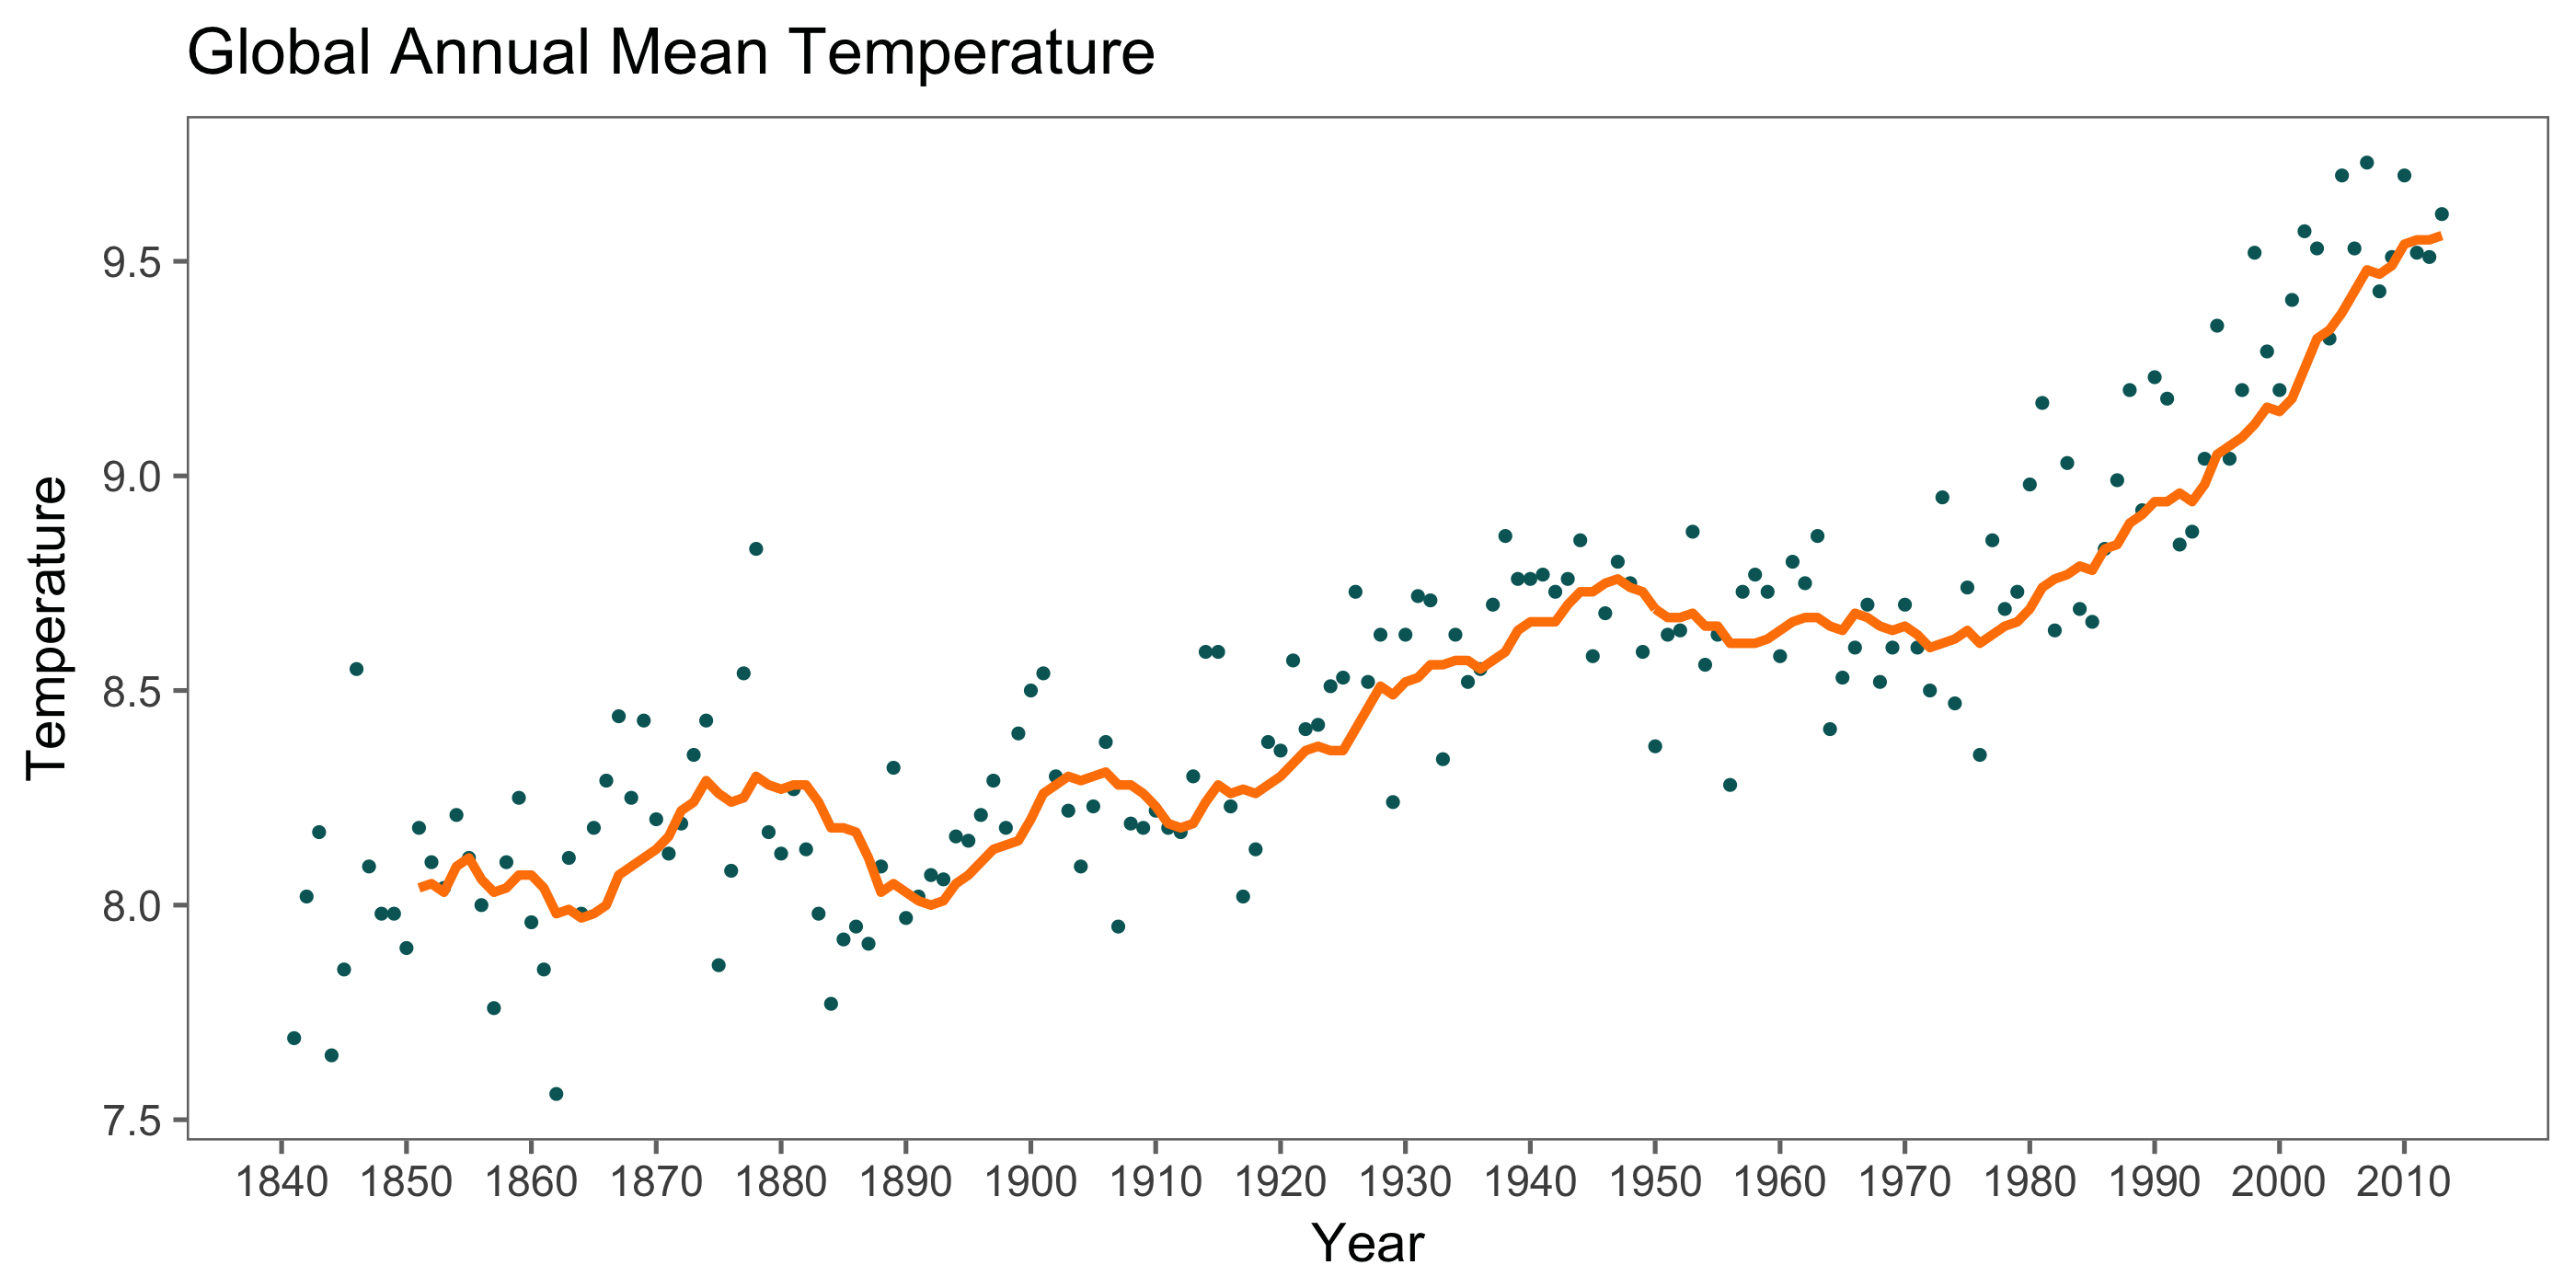

In [8]:
# PLOT GLOBAL yearly and 10 year average

ggplot(data = subset(weather, city == 'Melbourne'), aes(x = year, y = global_avg_temp)) +
  geom_point(size = .8, colour = '#006666') +
  geom_line(aes(y = X10_glo_avg), colour = '#ff8100', size = 1) +
  scale_x_continuous(breaks = seq(1840, 2013, 10)) +
  scale_y_continuous(breaks = seq(0,10, 0.5)) +
  labs(title = "Global Annual Mean Temperature", 
       x = "Year",
       y = "Temperature") +
  theme_few() + scale_colour_tableau()

**Plot 3**<br>
How do temperatures in Melbourne city compare to Global temperatures?<br>
<br>
**Observation 3**
When plotted together, we can see that both Melbourne and Global temperatures have increased over time. The data suggests that changes in global temperature are reflected by changes in temperature in Melbourne.
On average, temperatures in Melbourne are well above Global temperatures. This has been fairly consistent over time, however, the trend is more dramatic on the global scale.<br><br>


<table>
<tr>
<td style="background-color:#8ebbca;"></td>
<td style="background-color:#8ebbca;"><b>MIN</td>
<td style="background-color:#8ebbca;"><b>MEDIAN</td>
<td style="background-color:#8ebbca;"><b>MAX</td>
</tr>
<tr>
<td> <b>Global </td>
<td>7.9 </td>
<td>8.55 </td>
<td>9.56 </td>
</tr>
<tr>
<td> <b>Melbourne </td>
<td>10.74 </td>
<td>15.94 </td>
<td>20.29 </td>
</tr>
</table>

<br>
Overall, the world is getting hotter. This increase has been more dramatic since the 1970s. The temperatures in Melbourne are succinct with what is happening globally.



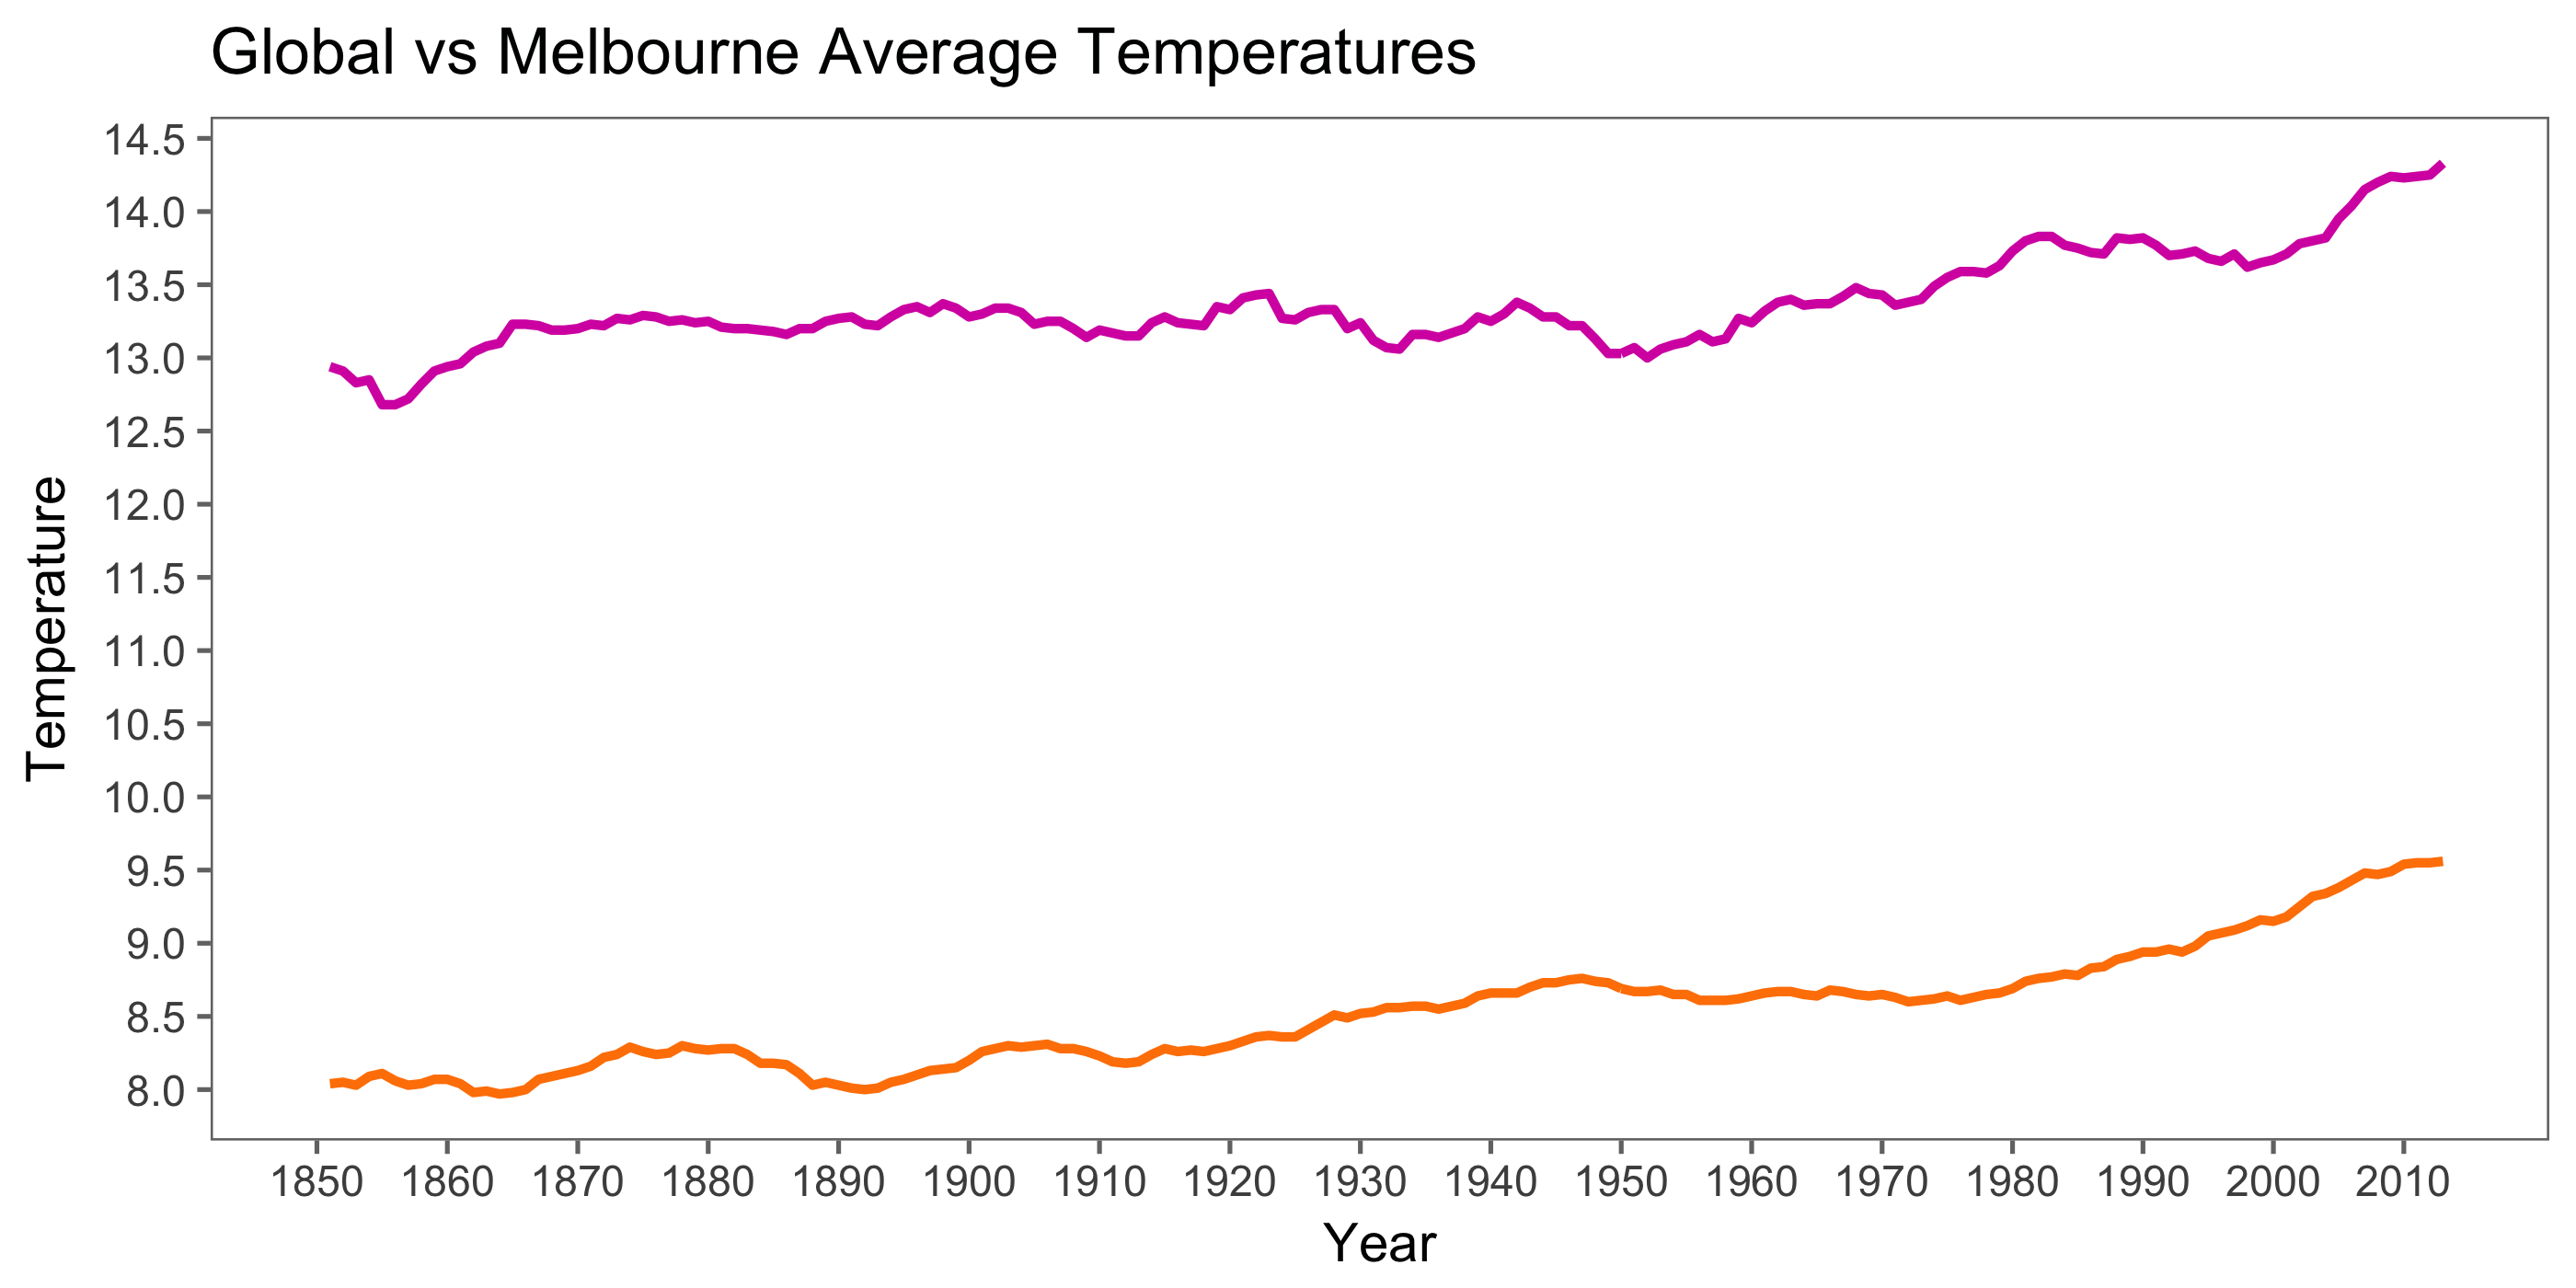

In [9]:
# Plot Melbourne 10yr Average VS Global 10 year AVG

ggplot(data = subset(weather, city == 'Melbourne'), aes(x = year)) +
  geom_line(aes(y = X10_city_avg), colour = '#d617b1', size = 1) +
  geom_line(aes(y = X10_glo_avg), colour = '#ff8100', size = 1) +
  scale_x_continuous(limits = c(1850, 2013), breaks = seq(1850, 2013, 10)) +
  scale_y_continuous(breaks = seq(0,20, 0.5)) +
  labs(title = "Global vs Melbourne Average Temperatures", 
       y = "Temperature", 
       x = "Year") +
 theme_few() + scale_colour_tableau()

### Additional Plots ###

**Plot 4**<br>
How do the yearly averages for New York compare to the 10 year moving average?<br>
<br>
**Observation 4** <br>
The data suggests that local average temperatures in New York are continually increasing. The trend is not overly smooth, there was a peak around 1955 followed by a drop around 1970, but overall, temperatures appear to be rising.

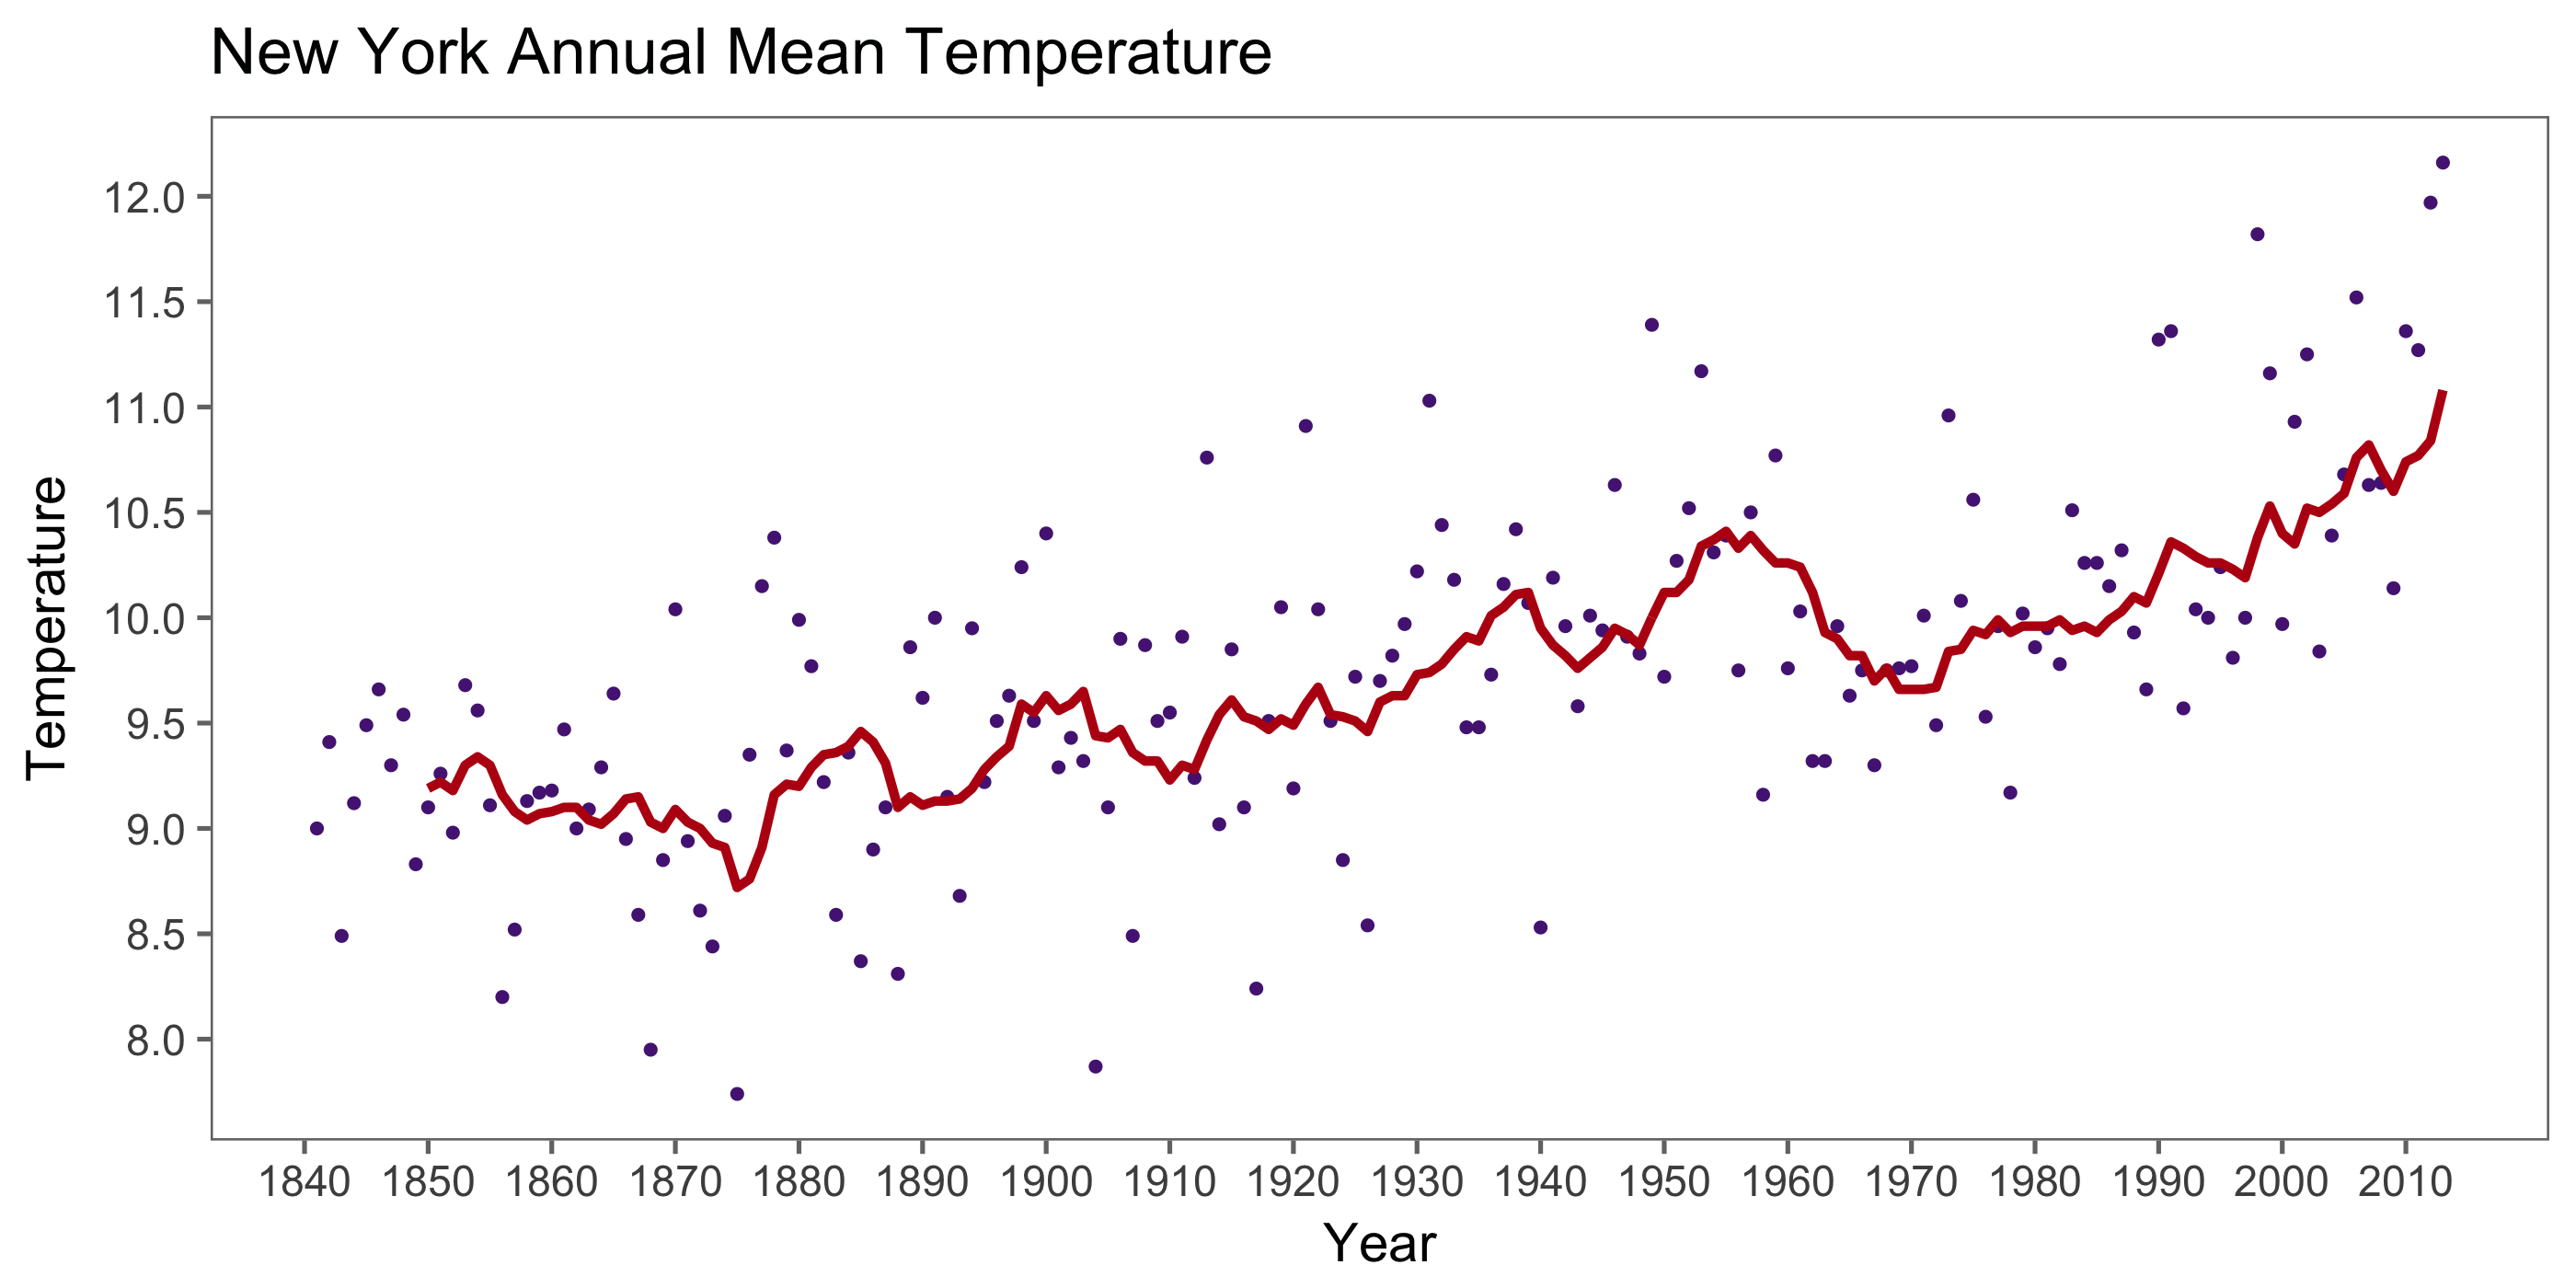

In [10]:
# PLOT NEW YORK yearly and 10 year average

ggplot(data = subset(weather, city == 'New York'), aes(x = year, y = city_avg_temp)) +
  geom_point(size = .8, colour = '#562383') +
  geom_line(aes(y = X10_city_avg), colour = '#BA1313', size = 1) +
  scale_x_continuous(breaks = seq(1840, 2013, 10)) +
  scale_y_continuous(breaks = seq(0,16, 0.5)) +
  labs(title = "New York Annual Mean Temperature", 
       x = "Year",
       y = "Temperature") +
  theme_few() + scale_colour_tableau()


**Plot 5**<br>
How do the 10 yearly average temperatures for New York compare to Melbourne?<br>
<br>
**Observation 5**<br>
While it is true that both cities have increasing temperatures; those in New York tend to fluctuate more dramatically, while in Melbourne, changes are relatively stable in comparison.

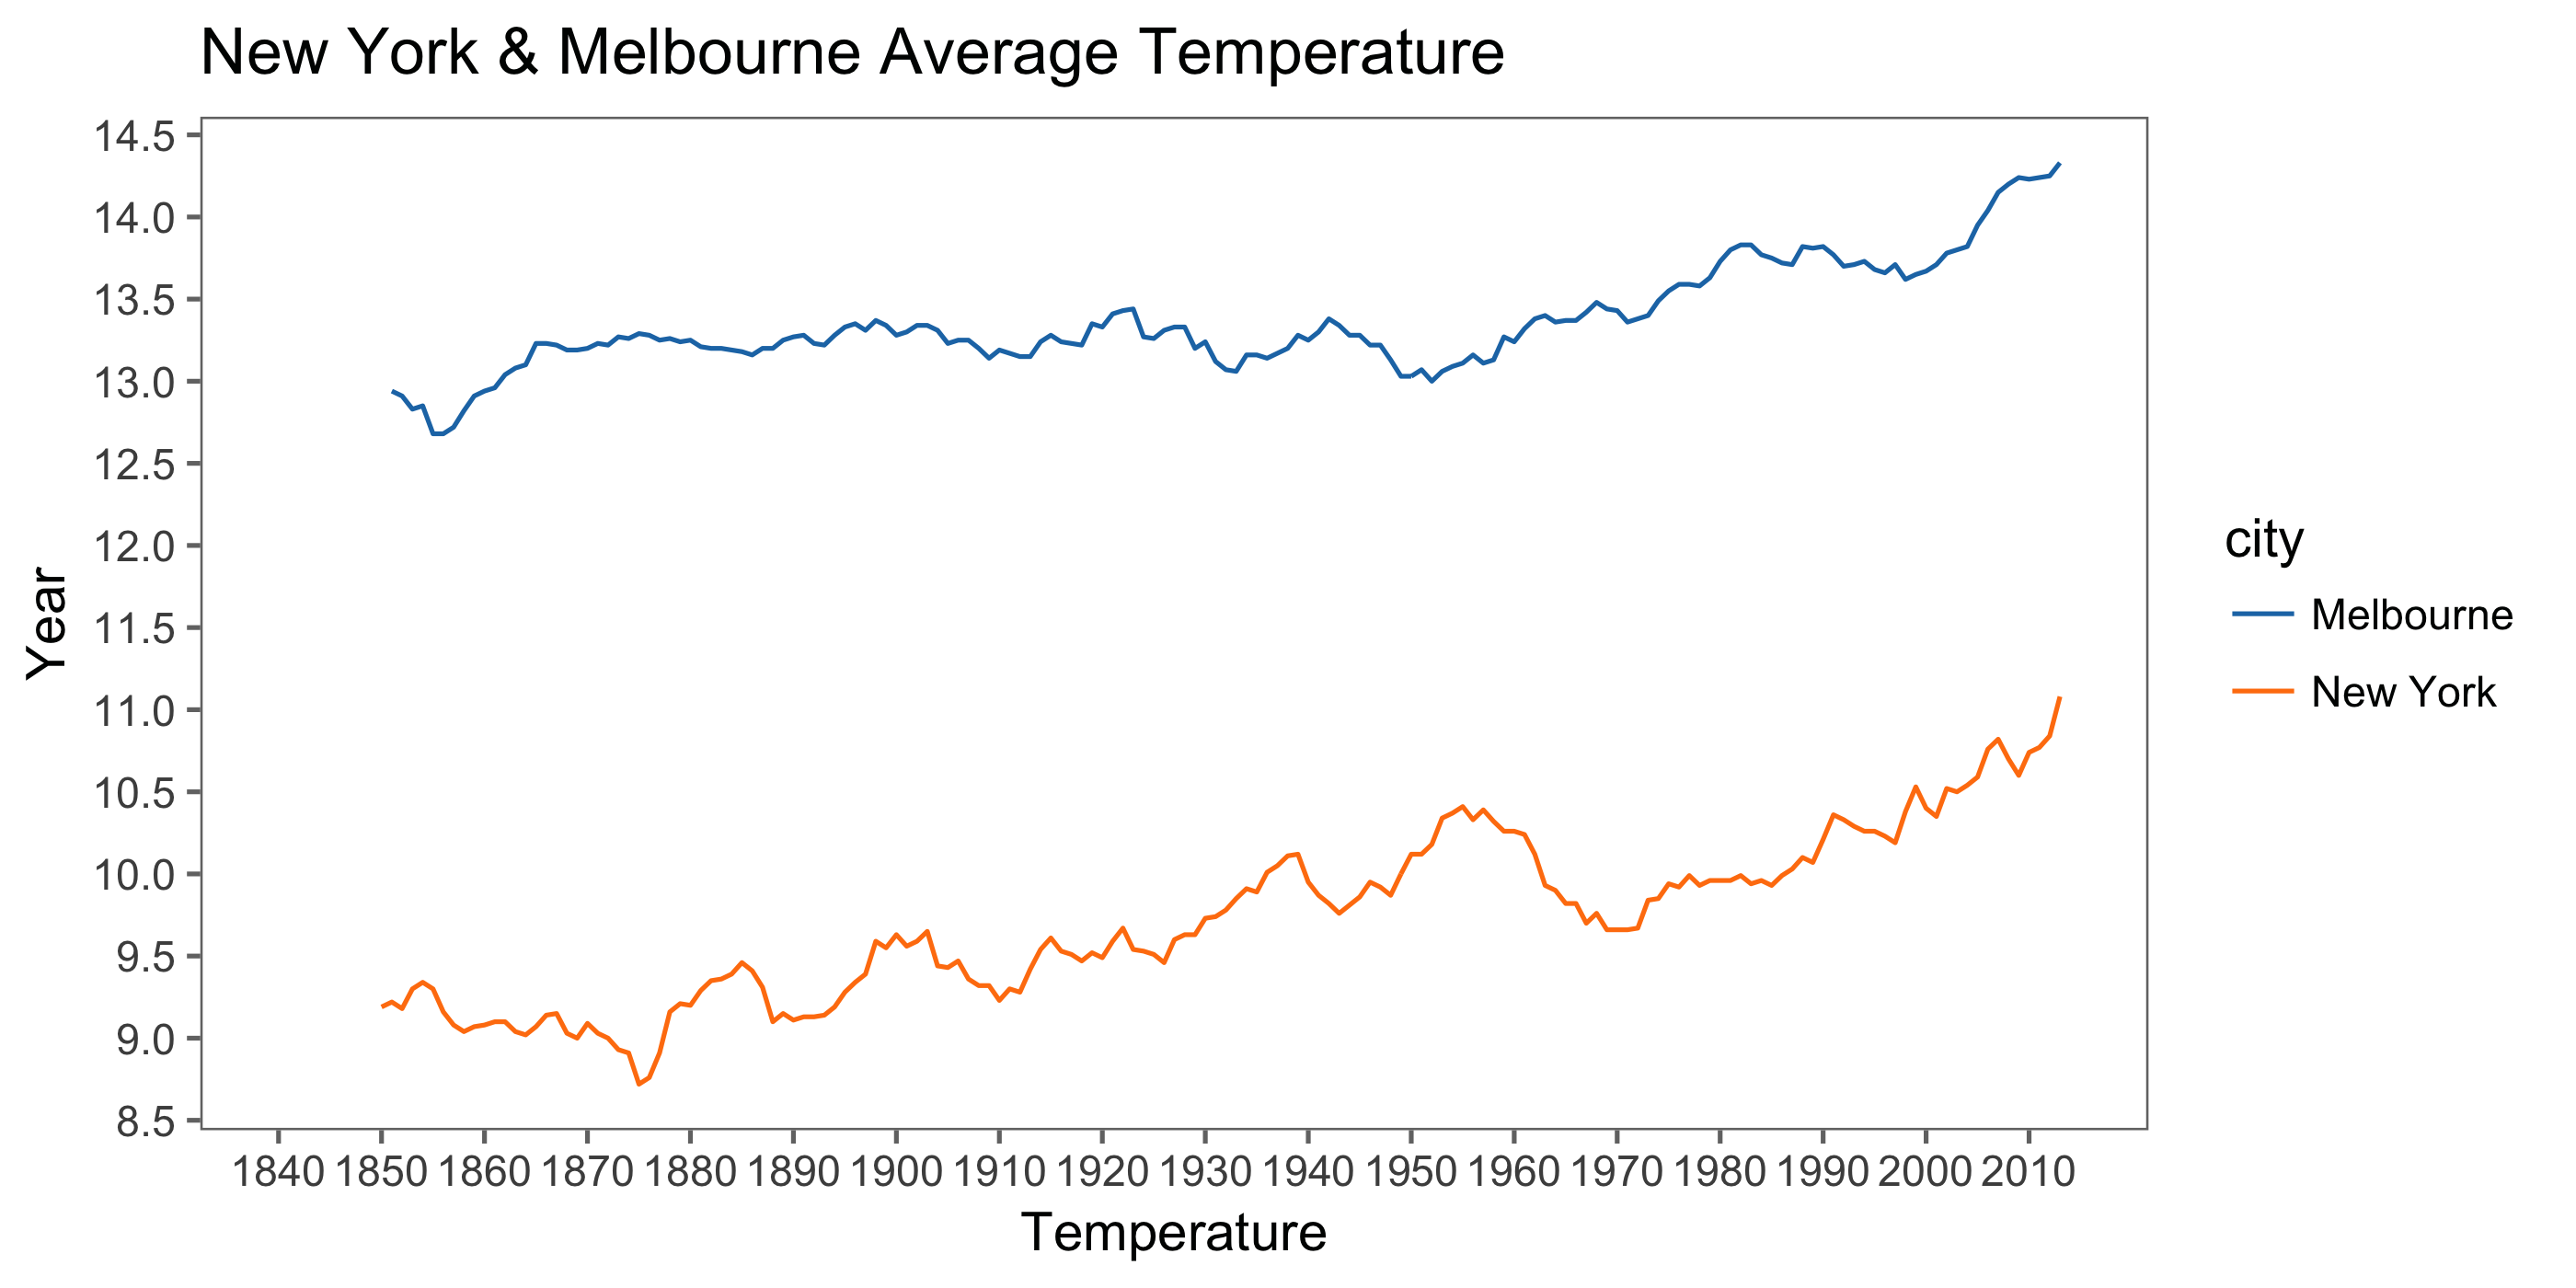

In [11]:
ggplot(data = subset(weather, city == 'Melbourne' | city == 'New York'), 
       aes(x = year, y = X10_city_avg, group = city, colour = city)) +
  geom_line() +
  scale_x_continuous(breaks = seq(1840, 2013, 10)) +
  scale_y_continuous(breaks = seq(0,16, 0.5)) +
  labs(title = "New York & Melbourne Average Temperature",
       y = "Year",
       x = "Temperature") +
  theme_few() + scale_colour_tableau()

### Calculate the Correlation Coefficient 
<br>
**Outline**<br>
Using R, fist subset the data to extract only the Melbourne and New York data. Then coerce the matrices into Data Frames using the Tibble package.<br>
<br>
**OUTPUT**<br>
Correlation Coefficient = 0.4084517

In [34]:
# Subset data, select only city and city_avg_columns
mel <- subset(weather, city == "Melbourne", select = c(city, city_avg_temp))
nyc <- subset(weather, city == "New York", select = c(city, city_avg_temp))

# use tibble to coerce into data frame
mel <- as_tibble(mel)
nyc <- as_tibble(nyc)

# calculate Correlation Coefficient
cor(mel$city_avg_temp, nyc$city_avg_temp)


[1] 0.4084517

This analysis formed part of the ***Data Analyst Nanodegree*** from **Udacity** 
<br>
https://www.udacity.com/course/data-analyst-nanodegree--nd002